In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

In [2]:
hr = pd.read_csv("HR_comma_sep.csv")
hr = pd.get_dummies(hr,drop_first=True)

In [3]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.10,0.77,6,247,4,0,1,0,False,False,False,False,False,False,True,False,False,True,False
3,0.92,0.85,5,259,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.89,1.00,5,224,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14991,0.37,0.48,2,160,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14992,0.37,0.53,2,143,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14993,0.11,0.96,6,280,4,0,1,0,False,False,False,False,False,False,False,True,False,True,False


In [4]:
X = hr.drop('left',axis=1)
y = hr['left']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=23)

In [16]:
dtc = DecisionTreeClassifier(random_state=23,max_depth=4)
dtc_fit=dtc.fit(X_train,y_train)

In [17]:
#for creating a grafical representaion view of the tree

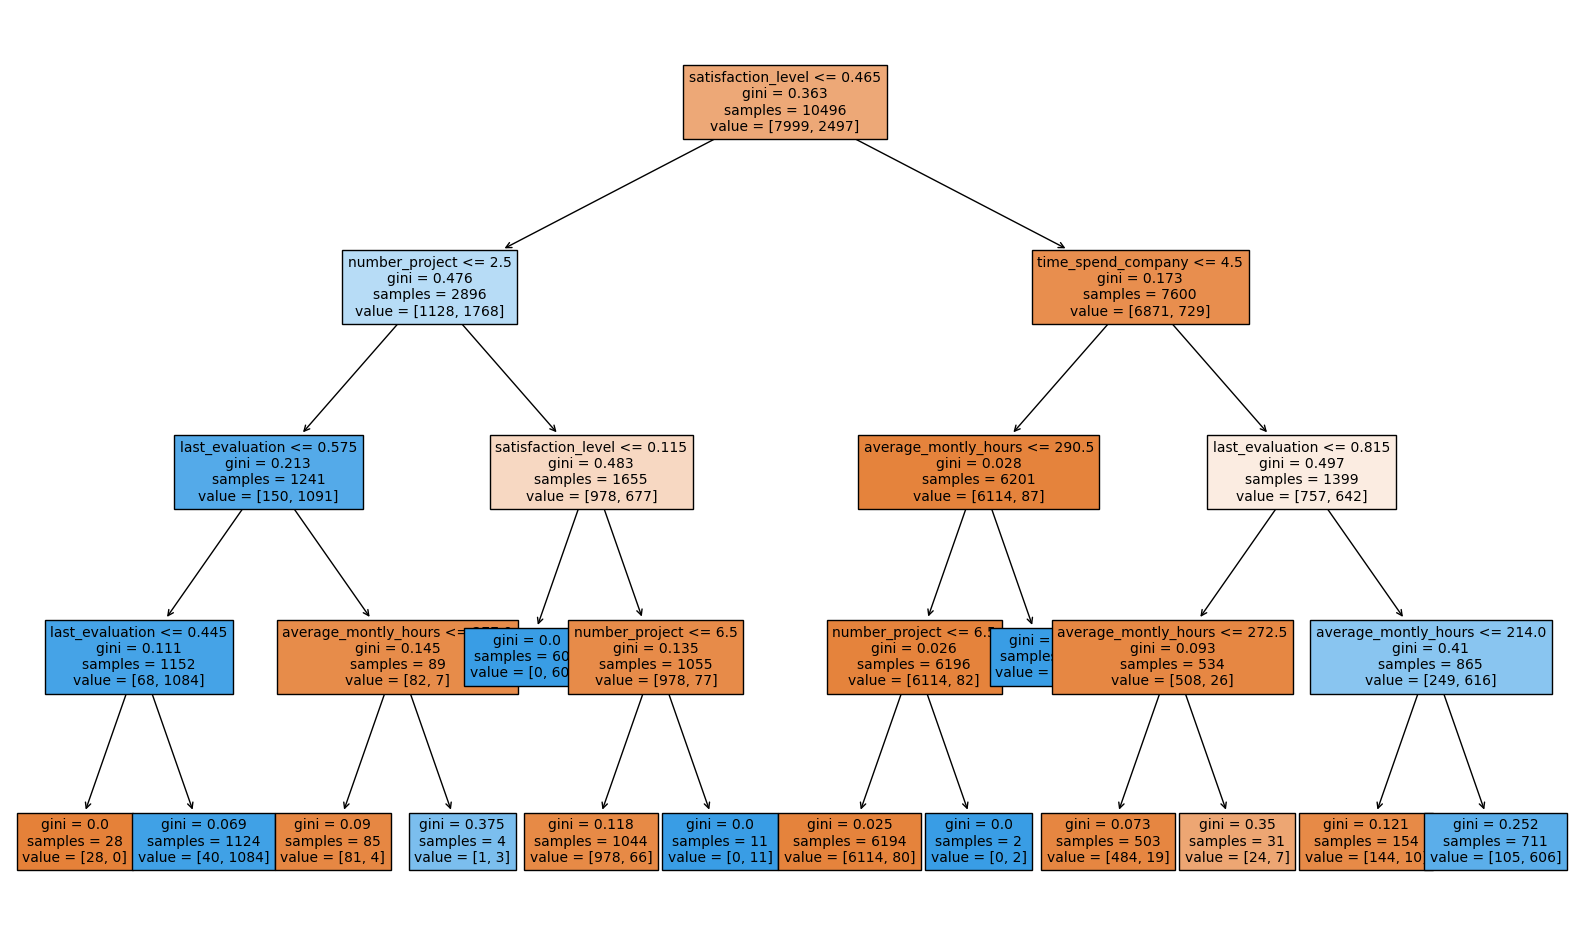

In [19]:
plt.figure(figsize=(20,12))
plot_tree(dtc_fit,feature_names=X_train.columns,filled=True,fontsize=10)
plt.show()

### Download the image(.png) of the Decision tree

In [20]:
# Display decision tree
from IPython.display import Image
from six import StringIO
import pydotplus
from sklearn import tree

In [21]:
dot_data=StringIO()
tree.export_graphviz(dtc_fit,out_file=dot_data,feature_names=X_train.columns,filled=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
graph.write_png('job.png')import dtreeviz as dtv

True

## Using GCV

In [64]:
y_pred=dtc.predict(X_test)
y_pred_proba=dtc.predict_proba(X_test)[:,1]
print(log_loss(y_test,y_pred_proba))

0.11882499218194707


In [65]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

In [66]:
params={'max_depth':[2,3,4,5,6,None]}

In [67]:
gcv=GridSearchCV(dtc,param_grid=params,cv=kfold,scoring='neg_log_loss')
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=4, random_state=23),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None]},
             scoring='neg_log_loss')

In [68]:
print("best parameter :",gcv.best_params_)
print("best score :",gcv.best_score_)

best parameter : {'max_depth': 6}
best score : -0.11458681615740332


### Importance

In [69]:
best_model = gcv.best_estimator_

In [70]:
df_imp=pd.DataFrame({'variable':best_model.feature_names_in_,
                    'importance':best_model.feature_importances_})
df_imp=df_imp[df_imp['importance']>0.0001]

In [72]:
df_imp

,variable,importance
15,Department_technical,0.000120
3,average_montly_hours,0.070362
2,number_project,0.100018
1,last_evaluation,0.144790
4,time_spend_company,0.153061
0,satisfaction_level,0.531650


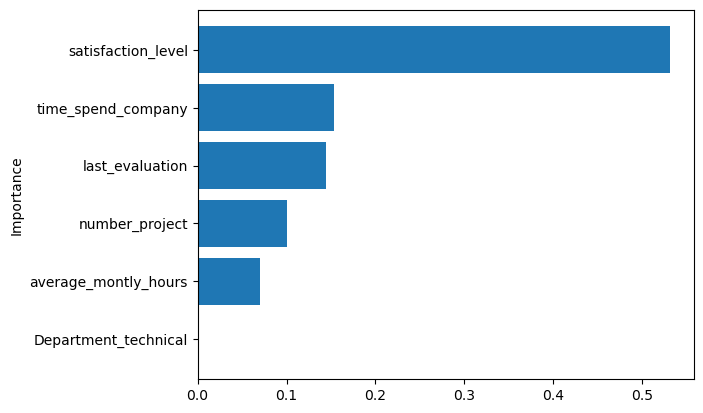

In [71]:
df_imp=df_imp.sort_values(by='importance')
plt.barh(df_imp['variable'],df_imp['importance'])
plt.ylabel("Importance")
plt.show()

### New hyperparameters

In [73]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

In [80]:
params={'max_depth':[2,3,4,5,6,None],
       'min_samples_split':[2,5,6,7,8,9,10],
       'min_samples_leaf':[1,3,5,7,10,15]}

In [87]:
gcv=GridSearchCV(dtc,param_grid=params,cv=kfold,scoring='neg_log_loss')
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=4, random_state=23),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 3, 5, 7, 10, 15],
                         'min_samples_split': [2, 5, 6, 7, 8, 9, 10]},
             scoring='neg_log_loss')

In [82]:
print("best parameter :",gcv.best_params_)
print("best score :",gcv.best_score_)

best parameter : {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 9}
best score : -0.10757957256759484


In [83]:
best_model = gcv.best_estimator_

In [84]:
df_imp=pd.DataFrame({'variable':best_model.feature_names_in_,
                    'importance':best_model.feature_importances_})
df_imp=df_imp[df_imp['importance']>0.0001]

In [85]:
df_imp

,variable,importance
0,satisfaction_level,0.531978
1,last_evaluation,0.144549
2,number_project,0.099690
3,average_montly_hours,0.070052
4,time_spend_company,0.153190
15,Department_technical,0.000454


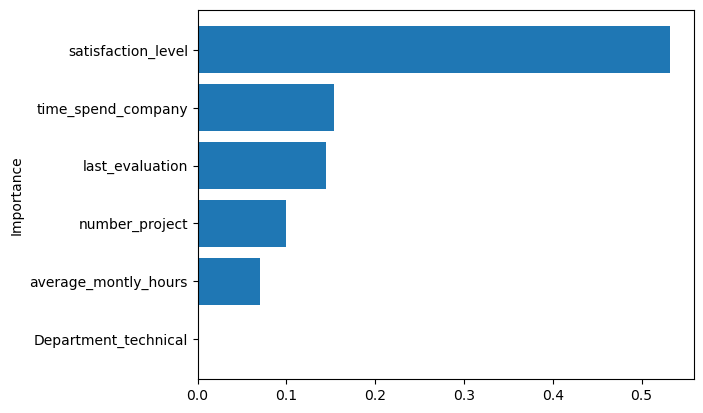

In [86]:
df_imp=df_imp.sort_values(by='importance')
plt.barh(df_imp['variable'],df_imp['importance'])
plt.ylabel("Importance")
plt.show()